In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [99]:
df=pd.read_csv('jersey city airbnb listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40669,https://www.airbnb.com/rooms/40669,20211220161334,2021-12-21,Skyy’s Lounge / Cozy,<b>The space</b><br />Skyy’s Lounge ....Everyt...,The neighborhood is very diverse & friendly sh...,https://a0.muscache.com/pictures/af7e4a45-0118...,175412,https://www.airbnb.com/users/show/175412,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.07
1,215768,https://www.airbnb.com/rooms/215768,20211220161334,2021-12-21,Minutes to Manhattan & Jersey Shore,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,...,4.90,4.31,4.80,STR20-00055,f,1,1,0,0,1.10
2,269266,https://www.airbnb.com/rooms/269266,20211220161334,2021-12-20,Modern private 2 bedrooms apt minutes to NYC,Enjoy that private luxury two bedrooms apartme...,Our House is located in the Liberty State Park...,https://a0.muscache.com/pictures/5c8382e2-d2d8...,1410590,https://www.airbnb.com/users/show/1410590,...,4.65,3.80,4.44,NaN,t,8,1,7,0,3.10
3,270245,https://www.airbnb.com/rooms/270245,20211220161334,2021-12-22,Private room with own bathroom close to NYC,Just for you small bedroom with private bathro...,NaN,https://a0.muscache.com/pictures/83004bc4-6ff2...,1410590,https://www.airbnb.com/users/show/1410590,...,4.68,3.89,4.57,NaN,t,8,1,7,0,2.04
4,271255,https://www.airbnb.com/rooms/271255,20211220161334,2021-12-22,Large Room with private bathroom min to Manhattan,You can enjoy your stay in large bedroom with ...,NaN,https://a0.muscache.com/pictures/26d49bd9-efe3...,1410590,https://www.airbnb.com/users/show/1410590,...,4.56,3.76,4.37,NaN,t,8,1,7,0,2.43


In [100]:
df.shape

(1001, 74)

In [101]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

# Business Understanding

## Some Potential Questions

1. Does the location of the property influence the price (geopandas),
2. Does the amount or quality of amenities corralate to a higher rating, 
3. Do hosts who are 'super_host' varified tend to have more or less availibility, 
4. Do above average prices also corralate to a higher overal rating ('review_scores_value'), 



# Data Understanding

## I noticed that there are many columns that I dont need so I will create a new datafram with the ones that I want to use for my questions.

In [102]:
new_df=df[['id','description','host_name','host_is_superhost','neighbourhood','latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms','amenities', 'price','number_of_reviews','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value','reviews_per_month']].copy()

In [103]:
new_df.describe()

,id,latitude,longitude,accommodates,bathrooms,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,1.001000e+03,1001.000000,1001.000000,1001.000000,0.0,1001.000000,737.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,737.000000
mean,3.568748e+07,40.725206,-74.057730,3.763237,NaN,28.969031,4.635156,4.717026,4.636112,4.816617,4.791241,4.603452,4.634789,1.369824
std,1.553927e+07,0.013781,0.017792,2.549291,NaN,55.567761,0.600365,0.519104,0.526554,0.426021,0.433149,0.525898,0.474971,1.472770
min,4.066900e+04,40.680595,-74.106990,1.000000,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,2.319890e+07,40.717090,-74.071460,2.000000,NaN,0.000000,4.530000,4.670000,4.500000,4.810000,4.760000,4.480000,4.530000,0.320000
50%,3.977404e+07,40.723980,-74.053690,3.000000,NaN,5.000000,4.770000,4.860000,4.780000,4.950000,4.940000,4.750000,4.740000,0.910000
75%,5.000920e+07,40.733480,-74.043180,5.000000,NaN,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,4.940000,2.000000
max,5.389060e+07,40.760700,-74.029390,16.000000,NaN,386.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.170000


# Data Preperation

## How many of the values of the dataset are missing ? how many should I remove if any?

In [104]:
new_df.isnull().sum()

id                                0
description                      27
host_name                         0
host_is_superhost                 0
neighbourhood                   366
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                      1001
amenities                         0
price                             0
number_of_reviews                 0
review_scores_rating            264
review_scores_accuracy          268
review_scores_cleanliness       268
review_scores_checkin           268
review_scores_communication     268
review_scores_location          268
review_scores_value             268
reviews_per_month               264
dtype: int64

## A big chuck of my review data is null I will create a new data frame to find all the rows that have all their rows 'null' then drop them 

In [105]:
all_null_review_df=new_df[(new_df.iloc[:,14:].isnull()).all(1)]

In [106]:
all_null_review_df.isnull().sum()

id                               0
description                     18
host_name                        0
host_is_superhost                0
neighbourhood                  153
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                      264
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating           264
review_scores_accuracy         264
review_scores_cleanliness      264
review_scores_checkin          264
review_scores_communication    264
review_scores_location         264
review_scores_value            264
reviews_per_month              264
dtype: int64

In [107]:
all_null_review_df.isnull().all()

id                             False
description                    False
host_name                      False
host_is_superhost              False
neighbourhood                  False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
bathrooms                       True
amenities                      False
price                          False
number_of_reviews              False
review_scores_rating            True
review_scores_accuracy          True
review_scores_cleanliness       True
review_scores_checkin           True
review_scores_communication     True
review_scores_location          True
review_scores_value             True
reviews_per_month               True
dtype: bool

In [108]:
new_df.shape

(1001, 22)

## As shown above, 264 rows have all of there review columns empty/missing so i will have to drop the those columns , in my mind there are several reasons to drop them. 
## 1) I can not make predictions on missing data
## 2) creating any visualizations on using that data can skew the graphs
## 3) If i decided to impute  data could create bias models


In [109]:
#new_df.drop(new_df[new_df.iloc[:,14:].isnull().all(1)])
#newer_df=new_df.dropna(subset=[iloc[:,14:].dropna(how='all').copy()
newer_df=new_df.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'],thresh=2).copy()


In [110]:
newer_df

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,40669,<b>The space</b><br />Skyy’s Lounge ....Everyt...,Skyy,f,"Jersey City, New Jersey, United States",40.73742,-74.05255,Private room in condominium (condo),Private room,2,...,$128.00,10,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.07
1,215768,Walking to distance to Statue of Liberty and E...,Charlaine,t,"Jersey City, New Jersey, United States",40.71663,-74.05799,Entire residential home,Entire home/apt,4,...,$111.00,137,4.76,4.78,4.88,4.84,4.90,4.31,4.80,1.10
2,269266,Enjoy that private luxury two bedrooms apartme...,Magda,f,"Jersey City, New Jersey, United States",40.71266,-74.06329,Entire rental unit,Entire home/apt,5,...,$109.00,380,4.34,4.62,4.55,4.68,4.65,3.80,4.44,3.10
3,270245,Just for you small bedroom with private bathro...,Magda,f,NaN,40.71203,-74.06532,Private room in townhouse,Private room,1,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,NaN,40.71258,-74.06284,Private room in townhouse,Private room,5,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,53759149,Welcome to this spacious and conveniently loca...,Tamaya,f,"Jersey City, New Jersey, United States",40.71440,-74.05805,Entire rental unit,Entire home/apt,3,...,$105.00,1,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00
988,53769304,Located by the Hackensack River Waterfront is ...,Rhianna,f,"Jersey City, New Jersey, United States",40.71598,-74.09168,Entire rental unit,Entire home/apt,3,...,$138.00,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00
993,53798736,Enjoy a central Jersey City location about 20-...,Robert,f,"Jersey City, New Jersey, United States",40.74452,-74.05993,Entire rental unit,Entire home/apt,5,...,$164.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,f,NaN,40.71918,-74.03405,Entire rental unit,Entire home/apt,4,...,$129.00,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00


In [111]:
newer_df.isnull().sum()

id                               0
description                      9
host_name                        0
host_is_superhost                0
neighbourhood                  213
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                      737
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           4
review_scores_cleanliness        4
review_scores_checkin            4
review_scores_communication      4
review_scores_location           4
review_scores_value              4
reviews_per_month                0
dtype: int64

## As shown above there are still some missing values in all the review columns , next I will check to see if i need to remove  any more or if I can simply impute values in those columns 

In [112]:
newer_df.loc[newer_df['review_scores_rating']<2.0]

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
175,18457368,Standing 50 stories high & overlooking Manhatt...,Bluebird,f,"Jersey City, New Jersey, United States",40.72484,-74.03607,Entire rental unit,Entire home/apt,5,...,$319.00,1,1.0,1.0,5.0,2.0,4.0,5.0,2.0,0.08
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,NaN,40.70719,-74.07693,Private room in residential home,Private room,2,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,3,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,3,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,5,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07
654,46006086,Standing 50 stories high & overlooking Manhatt...,Bluebird,f,NaN,40.72466,-74.03761,Entire rental unit,Entire home/apt,3,...,$229.00,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.55
837,51846874,this beautiful house is perfect for a big fami...,Ehab,f,NaN,40.73489,-74.05252,Entire residential home,Entire home/apt,5,...,$159.00,1,1.0,1.0,1.0,4.0,4.0,2.0,1.0,1.00
847,51990254,No frill simple room perfect getaway from the ...,Waseem,f,NaN,40.72923,-74.07949,Private room in rental unit,Private room,1,...,$35.00,1,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.00
896,52732937,"Dear travelers and Airbnbers,<br /><br />This ...",Jimmy,f,NaN,40.74561,-74.04422,Private room in loft,Private room,5,...,$364.00,1,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.57


In [113]:
newer_df.loc[newer_df['review_scores_cleanliness'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,NaN,40.70719,-74.07693,Private room in residential home,Private room,2,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,3,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,3,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,5,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [114]:
newer_df.loc[newer_df['review_scores_checkin'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,NaN,40.70719,-74.07693,Private room in residential home,Private room,2,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,3,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,3,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,5,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [115]:
newer_df.loc[newer_df['review_scores_communication'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,NaN,40.70719,-74.07693,Private room in residential home,Private room,2,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,3,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,3,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,5,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [116]:
newer_df.loc[newer_df['review_scores_location'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,NaN,40.70719,-74.07693,Private room in residential home,Private room,2,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,3,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,3,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,5,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [117]:
newer_df.loc[newer_df['review_scores_value'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,NaN,40.70719,-74.07693,Private room in residential home,Private room,2,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,3,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,3,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,5,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


## As shown I immediately found the 4 multiple rows with the missing values across the columns, i believe becuse the 'review rating column has a value 0.0 i can just impute zeros into the columns

In [118]:
newer_df.iloc[:,14:]=newer_df.replace(np.nan,0)

In [119]:
newer_df[newer_df.host_name=='Kim']

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
60,7144168,Fully Furnished one bedroom apartment a very c...,Kim,f,NaN,40.71909,-74.03870,Entire serviced apartment,Entire home/apt,4,...,$116.00,6,4.60,4.80,5.00,4.20,4.20,4.80,4.60,0.08
62,7535655,"These waterfront apartments in Jersey City, Ne...",Kim,f,NaN,40.71417,-74.03681,Entire serviced apartment,Entire home/apt,3,...,$149.00,24,4.60,4.60,4.60,5.00,4.80,5.00,4.65,0.53
63,7535715,These downtown apartments are a 10-minute tra...,Kim,f,NaN,40.71935,-74.03956,Entire serviced apartment,Entire home/apt,3,...,$143.00,13,4.45,4.90,4.80,4.50,4.80,4.90,4.50,0.17
93,10492376,This is a large one bedroom right by Grove Str...,Kim,f,NaN,40.71927,-74.03998,Entire serviced apartment,Entire home/apt,4,...,$130.00,3,4.50,4.50,4.00,4.50,3.50,5.00,4.50,0.04
294,25867641,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,NaN,40.73327,-74.06308,Entire rental unit,Entire home/apt,3,...,$189.00,7,4.50,4.75,4.50,4.25,4.50,4.75,4.50,0.17
295,25967076,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,NaN,40.73955,-74.06336,Entire rental unit,Entire home/apt,3,...,$145.00,7,4.57,4.43,4.29,4.57,4.57,4.57,4.14,0.17
300,26216865,"Featuring free WiFi and air conditioning, Marb...",Kim,f,NaN,40.72301,-74.03633,Entire rental unit,Entire home/apt,3,...,$175.00,3,5.00,5.00,4.50,5.00,5.00,5.00,4.50,0.10
314,27463037,"With grace and sophistication, The Gotham sta...",Kim,f,NaN,40.71591,-74.03972,Entire rental unit,Entire home/apt,5,...,$198.00,4,2.50,3.00,3.50,2.00,2.50,4.00,4.00,0.10
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,3,...,$135.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,3,...,$159.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04


## city

In [120]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Bayonne, New Jersey, United States          2
泽西城, New Jersey, United States              1
Union City, New Jersey, United States       1
Name: neighbourhood, dtype: int64

In [121]:
(newer_df.neighbourhood=='Jersey City, New Jersey, United States').sum()

520

In [122]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Bayonne, New Jersey, United States          2
泽西城, New Jersey, United States              1
Union City, New Jersey, United States       1
Name: neighbourhood, dtype: int64

## Instead of getting rid of the 366 missing values in the neighbourhood column and creating a  selection bias, I will fill those rows with the city the property is located by using the latitude and longitude coordinates 

## Using lat and lon to return address then strip it so it only returns the city and state

In [123]:
nan_neighbourhood=new_df[new_df['neighbourhood'].isnull()]

In [124]:
nan_neighbourhood

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3,270245,Just for you small bedroom with private bathro...,Magda,f,NaN,40.71203,-74.06532,Private room in townhouse,Private room,1,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,NaN,40.71258,-74.06284,Private room in townhouse,Private room,5,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
5,508581,JANUARY AND FEBRUARY DISCOUNT! Beautiful large...,Zachary,f,NaN,40.71979,-74.04549,Entire rental unit,Entire home/apt,4,...,$139.00,56,4.44,4.67,4.44,4.89,4.69,4.73,4.36,0.49
13,1014258,Entire condo available in Jersey City Heights....,Shannon,f,NaN,40.73765,-74.04952,Entire condominium (condo),Entire home/apt,2,...,$100.00,9,4.56,4.75,4.33,5.00,4.67,4.75,4.38,0.10
14,1276863,Luxury Waterfront Apartment<br /><br /><b>The ...,Beata,f,NaN,40.71355,-74.03374,Entire rental unit,Entire home/apt,3,...,$191.00,145,4.78,4.90,4.86,4.87,4.87,4.90,4.78,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,53812669,NaN,Iresh,f,NaN,40.70951,-74.07667,Private room in rental unit,Private room,2,...,$86.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,53827593,Spacious 550 sq ft. studio apartment for two a...,Mugdha,f,NaN,40.72284,-74.03714,Entire rental unit,Entire home/apt,2,...,$100.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,f,NaN,40.71918,-74.03405,Entire rental unit,Entire home/apt,4,...,$129.00,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00
998,53849201,Stay for 30+ nights (minimum nights and rates ...,Carolyn,f,NaN,40.73516,-74.06379,Entire serviced apartment,Entire home/apt,3,...,$191.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
nan_neighbourhood['neighbourhood'].isnull().sum()

366

In [126]:
nan_neighbourhood[['latitude','longitude']].isnull()

,latitude,longitude
3,False,False
4,False,False
5,False,False
13,False,False
14,False,False
...,...,...
994,False,False
995,False,False
997,False,False
998,False,False


In [127]:
from geopy.geocoders import Nominatim

In [128]:
geolocator= Nominatim(user_agent='http')
location = geolocator.reverse('40.71355,-74.03374')
print(location.raw.get('address').get('city'))

Jersey City


In [129]:
import geocoder
def geo_rev(x):
    g = geocoder.osm([x.latitude,x.longitude], method='reverse').json
    if g:
        return g.get('city')
    else:
        return 'Nothing'
    
# running the function by entering the latitude and longitude coordinantes and returning only the city, the applying to the 
# 'neighbourhood' column
nan_neighbourhood.neighbourhood=nan_neighbourhood[['latitude','longitude']].apply(geo_rev,axis=1)

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [130]:
nan_neighbourhood

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3,270245,Just for you small bedroom with private bathro...,Magda,f,Jersey City,40.71203,-74.06532,Private room in townhouse,Private room,1,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Jersey City,40.71258,-74.06284,Private room in townhouse,Private room,5,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
5,508581,JANUARY AND FEBRUARY DISCOUNT! Beautiful large...,Zachary,f,Jersey City,40.71979,-74.04549,Entire rental unit,Entire home/apt,4,...,$139.00,56,4.44,4.67,4.44,4.89,4.69,4.73,4.36,0.49
13,1014258,Entire condo available in Jersey City Heights....,Shannon,f,Jersey City,40.73765,-74.04952,Entire condominium (condo),Entire home/apt,2,...,$100.00,9,4.56,4.75,4.33,5.00,4.67,4.75,4.38,0.10
14,1276863,Luxury Waterfront Apartment<br /><br /><b>The ...,Beata,f,Jersey City,40.71355,-74.03374,Entire rental unit,Entire home/apt,3,...,$191.00,145,4.78,4.90,4.86,4.87,4.87,4.90,4.78,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,53812669,NaN,Iresh,f,Jersey City,40.70951,-74.07667,Private room in rental unit,Private room,2,...,$86.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,53827593,Spacious 550 sq ft. studio apartment for two a...,Mugdha,f,Jersey City,40.72284,-74.03714,Entire rental unit,Entire home/apt,2,...,$100.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,f,Jersey City,40.71918,-74.03405,Entire rental unit,Entire home/apt,4,...,$129.00,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00
998,53849201,Stay for 30+ nights (minimum nights and rates ...,Carolyn,f,Jersey City,40.73516,-74.06379,Entire serviced apartment,Entire home/apt,3,...,$191.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filling the 'Nan' values in the new_df.neighbourhood using the vaules in nan_neighbourhood.neighbourhood column

In [131]:
newer_df.neighbourhood.fillna(nan_neighbourhood.neighbourhood,inplace=True)

In [132]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Jersey City                               212
Bayonne, New Jersey, United States          2
泽西城, New Jersey, United States              1
Union City, New Jersey, United States       1
Name: neighbourhood, dtype: int64

### I noticed that I need to extract only the 'Jersey City' for consistancy 

In [133]:
newer_df.neighbourhood=newer_df.neighbourhood.str[:11]

In [134]:
newer_df.neighbourhood.value_counts()

Jersey City    732
Bayonne, Ne      2
泽西城, New Je      1
Union City,      1
Name: neighbourhood, dtype: int64

### Now finally I will only keep the rows that contain 'Jersey city'

In [135]:
newer_df.drop(newer_df[newer_df.neighbourhood !='Jersey City'].index,inplace=True)

In [136]:
newer_df.neighbourhood.value_counts()

Jersey City    732
Name: neighbourhood, dtype: int64

### I noticed that the 'price' column was missing when I used the pandas "describe" method which return  numerical data
### My suspicion was correct , using the 'dtypes' method shows that the price column is an object (string) 

In [137]:
newer_df.price.dtypes

dtype('O')

In [138]:
newer_df.price

0      $128.00
1      $111.00
2      $109.00
3       $46.00
4       $62.00
        ...   
987    $105.00
988    $138.00
993    $164.00
997    $129.00
999    $216.00
Name: price, Length: 732, dtype: object

### To change the 'price' column into an integer I will remove the the '$' from in front of each number than change them into integers

In [139]:
# I notices that the price is an object because it has the '$' in front so i will change that to a int

newer_df['price']=newer_df['price'].str.replace('$','')
newer_df['price']=newer_df['price'].str.replace(',','').astype('float').astype('int64')

In [140]:
newer_df.price

0      128
1      111
2      109
3       46
4       62
      ... 
987    105
988    138
993    164
997    129
999    216
Name: price, Length: 732, dtype: int64

In [141]:
newer_df.describe()

,id,latitude,longitude,accommodates,bathrooms,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,7.320000e+02,732.000000,732.000000,732.000000,0.0,732.000000,732.00000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,3.294083e+07,40.724715,-74.059267,3.829235,NaN,143.646175,39.54918,4.635342,4.691339,4.610615,4.789372,4.764440,4.578197,4.609399,1.374071
std,1.562025e+07,0.014026,0.017411,2.674717,NaN,134.678374,61.69289,0.601918,0.624558,0.627399,0.554787,0.559042,0.625765,0.584746,1.475476
min,4.066900e+04,40.687720,-74.104190,1.000000,NaN,19.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2.141320e+07,40.715947,-74.073048,2.000000,NaN,64.000000,3.00000,4.530000,4.670000,4.500000,4.810000,4.757500,4.470000,4.520000,0.320000
50%,3.521806e+07,40.723610,-74.056490,3.000000,NaN,108.000000,13.00000,4.770000,4.860000,4.770000,4.950000,4.940000,4.750000,4.740000,0.910000
75%,4.710478e+07,40.732035,-74.044615,5.000000,NaN,179.000000,48.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,4.940000,2.000000
max,5.385857e+07,40.759320,-74.030520,16.000000,NaN,1321.000000,386.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.170000


Text(0.5, 1.0, 'price per prop type')

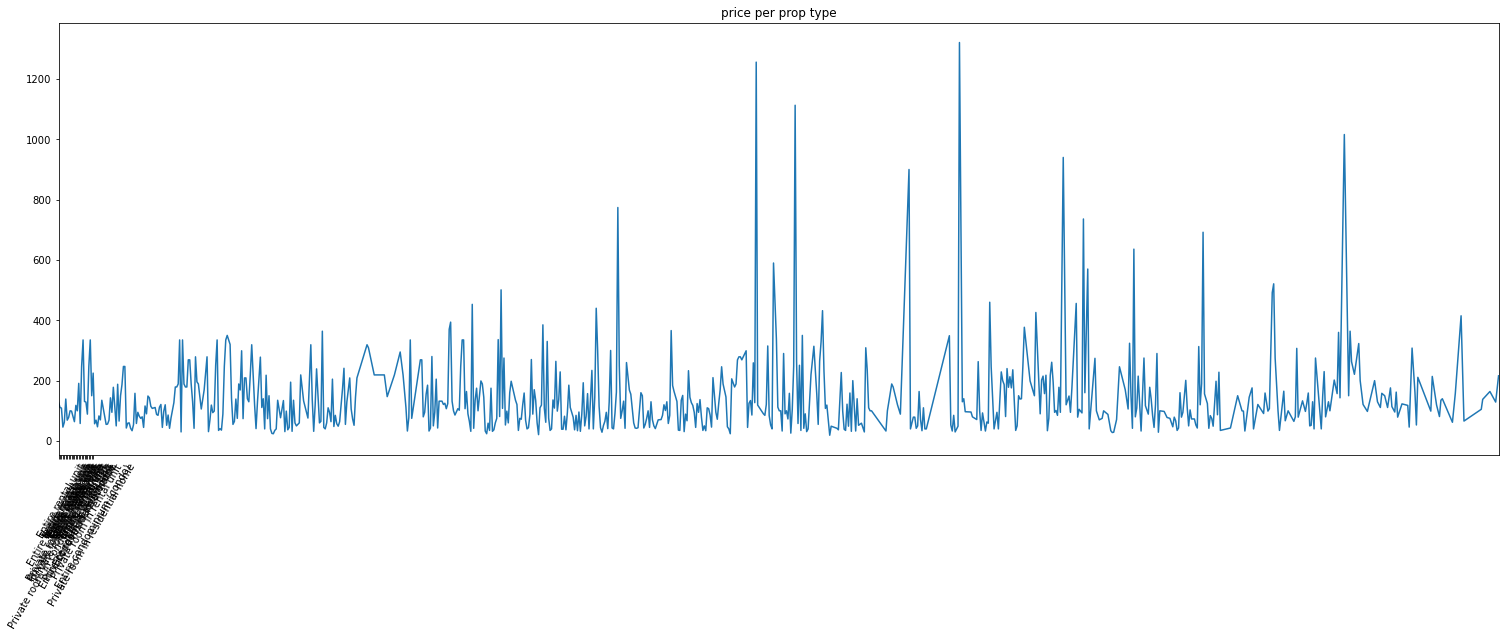

In [161]:
fig=plt.figure(figsize=(20,6))
ax=fig.add_axes([.1,.1,1,1])

newer_df.price.plot()

ax.set_xticks(range(25))
ax.set_xticklabels(newer_df.property_type,rotation=60,fontsize='medium')
ax.set_title('price per prop type')




In [ ]:
### I need to group each property type and then average each property then graph that

## Dummy variables for property_type

In [142]:
newer_df.property_type.value_counts()

Entire rental unit                     343
Private room in residential home       101
Private room in rental unit             94
Entire condominium (condo)              52
Entire residential home                 39
Private room in townhouse               17
Private room in condominium (condo)     16
Entire townhouse                        16
Room in hotel                           14
Entire guest suite                      12
Entire serviced apartment               10
Entire loft                              5
Room in boutique hotel                   3
Private room in loft                     2
Private room in bed and breakfast        1
Tiny house                               1
Private room in guest suite              1
Entire place                             1
Private room in casa particular          1
Private room in serviced apartment       1
Entire home/apt                          1
Room in serviced apartment               1
Name: property_type, dtype: int64

In [143]:
pd.get_dummies(newer_df.property_type)

,Entire condominium (condo),Entire guest suite,Entire home/apt,Entire loft,Entire place,Entire rental unit,Entire residential home,Entire serviced apartment,Entire townhouse,Private room in bed and breakfast,...,Private room in guest suite,Private room in loft,Private room in rental unit,Private room in residential home,Private room in serviced apartment,Private room in townhouse,Room in boutique hotel,Room in hotel,Room in serviced apartment,Tiny house
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
993,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# join dataframe

In [145]:
newer_df.join(pd.get_dummies(newer_df.property_type))

,id,description,host_name,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,Private room in guest suite,Private room in loft,Private room in rental unit,Private room in residential home,Private room in serviced apartment,Private room in townhouse,Room in boutique hotel,Room in hotel,Room in serviced apartment,Tiny house
0,40669,<b>The space</b><br />Skyy’s Lounge ....Everyt...,Skyy,f,Jersey City,40.73742,-74.05255,Private room in condominium (condo),Private room,2,...,0,0,0,0,0,0,0,0,0,0
1,215768,Walking to distance to Statue of Liberty and E...,Charlaine,t,Jersey City,40.71663,-74.05799,Entire residential home,Entire home/apt,4,...,0,0,0,0,0,0,0,0,0,0
2,269266,Enjoy that private luxury two bedrooms apartme...,Magda,f,Jersey City,40.71266,-74.06329,Entire rental unit,Entire home/apt,5,...,0,0,0,0,0,0,0,0,0,0
3,270245,Just for you small bedroom with private bathro...,Magda,f,Jersey City,40.71203,-74.06532,Private room in townhouse,Private room,1,...,0,0,0,0,0,1,0,0,0,0
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Jersey City,40.71258,-74.06284,Private room in townhouse,Private room,5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,53759149,Welcome to this spacious and conveniently loca...,Tamaya,f,Jersey City,40.71440,-74.05805,Entire rental unit,Entire home/apt,3,...,0,0,0,0,0,0,0,0,0,0
988,53769304,Located by the Hackensack River Waterfront is ...,Rhianna,f,Jersey City,40.71598,-74.09168,Entire rental unit,Entire home/apt,3,...,0,0,0,0,0,0,0,0,0,0
993,53798736,Enjoy a central Jersey City location about 20-...,Robert,f,Jersey City,40.74452,-74.05993,Entire rental unit,Entire home/apt,5,...,0,0,0,0,0,0,0,0,0,0
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,f,Jersey City,40.71918,-74.03405,Entire rental unit,Entire home/apt,4,...,0,0,0,0,0,0,0,0,0,0


In [146]:

corrdict={}
for key,row in new_df.join(pd.get_dummies(newer_df.property_type)).iterrows():
    corrdict[key]={row.property_type:row.price}

In [147]:
corrdf= pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [148]:
corrdf

,Private room in condominium (condo),Entire residential home,Entire rental unit,Private room in townhouse,Entire condominium (condo),Private room in rental unit,Private room in residential home,Entire serviced apartment,Entire guest suite,Room in serviced apartment,...,Room in hotel,Room in boutique hotel,Private room in guest suite,Boat,Private room in bed and breakfast,Private room in serviced apartment,Entire home/apt,Private room in loft,Entire vacation home,Private room in casa particular
0,$128.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,$111.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,$109.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,$46.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,$62.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,$96.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,$129.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,$191.00,0,0,...,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,$216.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
plt.figure(figsize=(6,6))
sns.heatmap(corrdf.corr())

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 432x432 with 0 Axes>

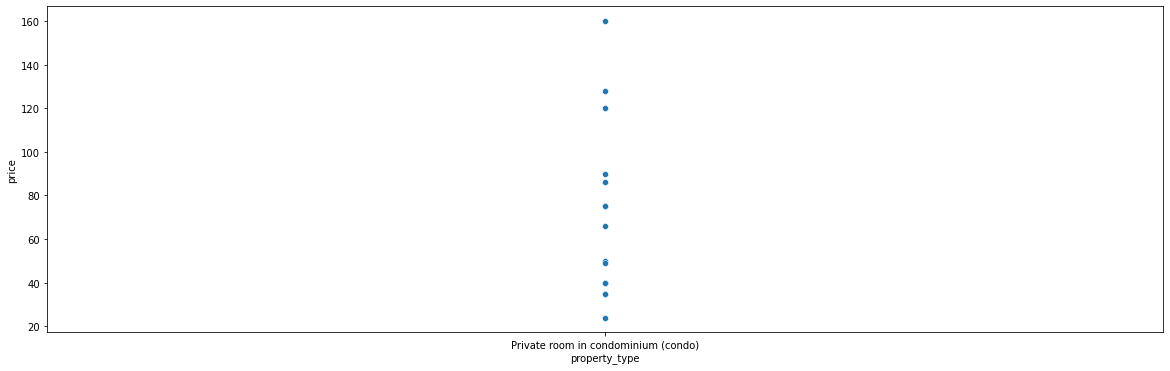

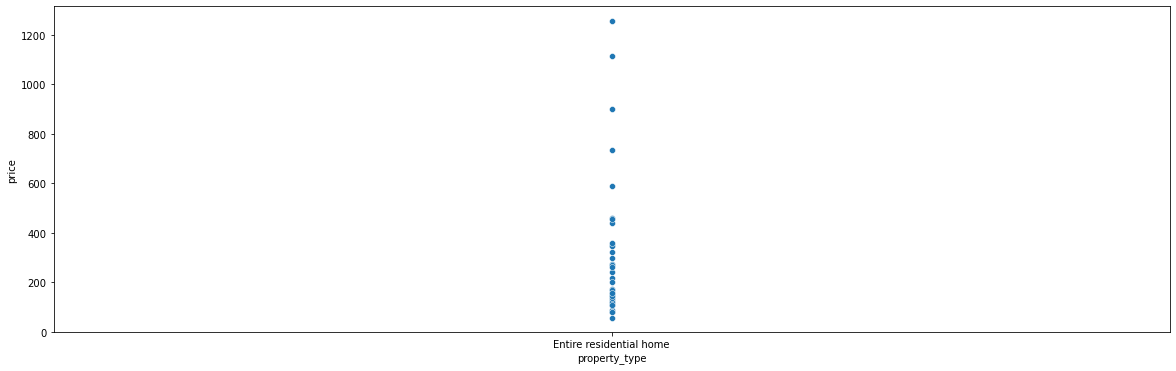

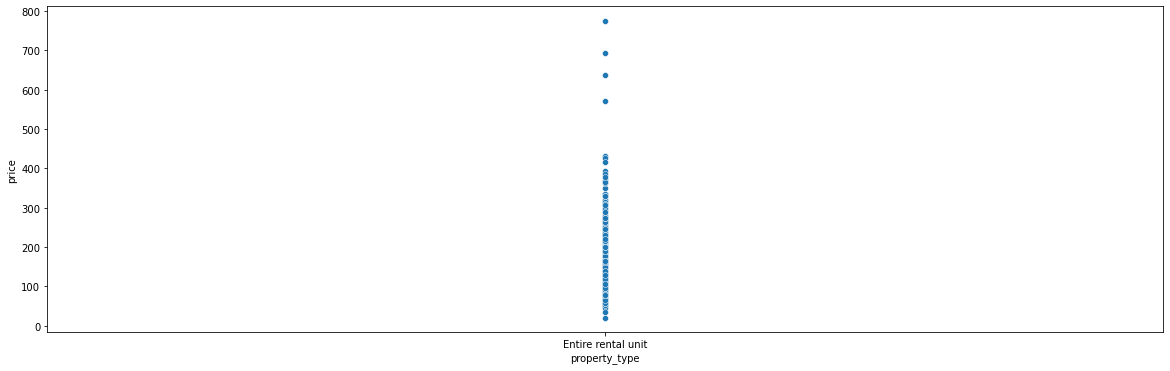

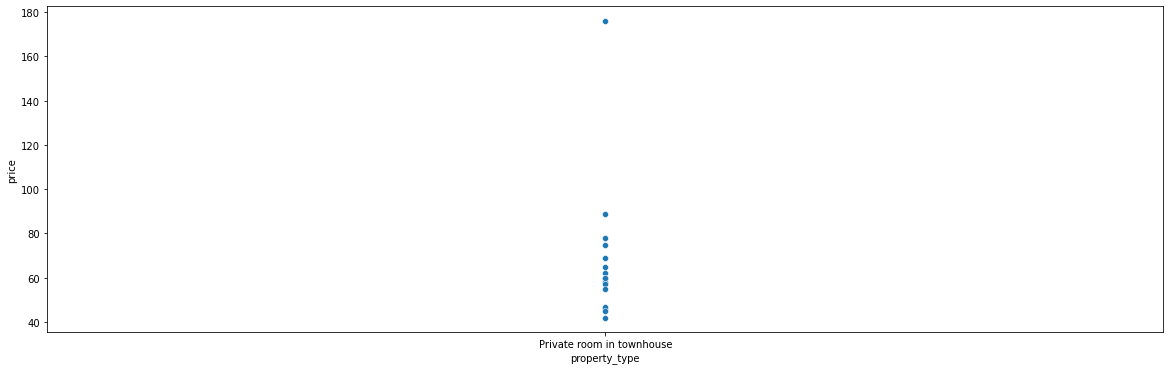

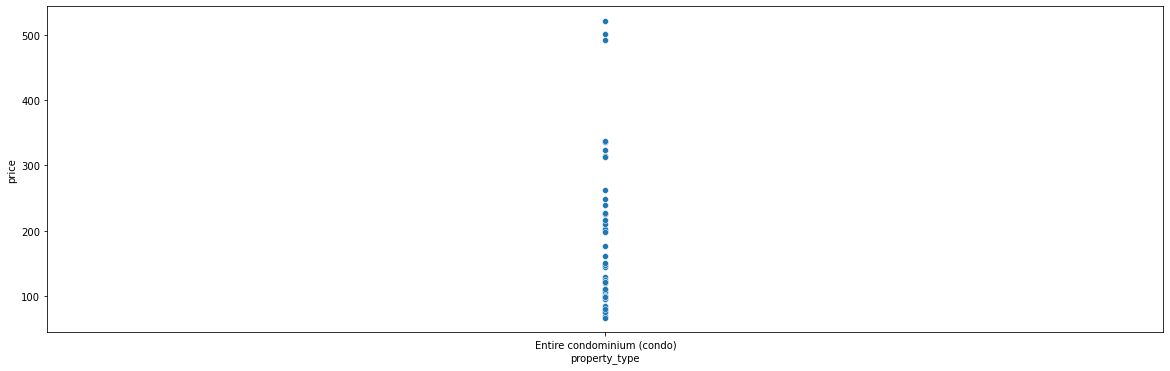

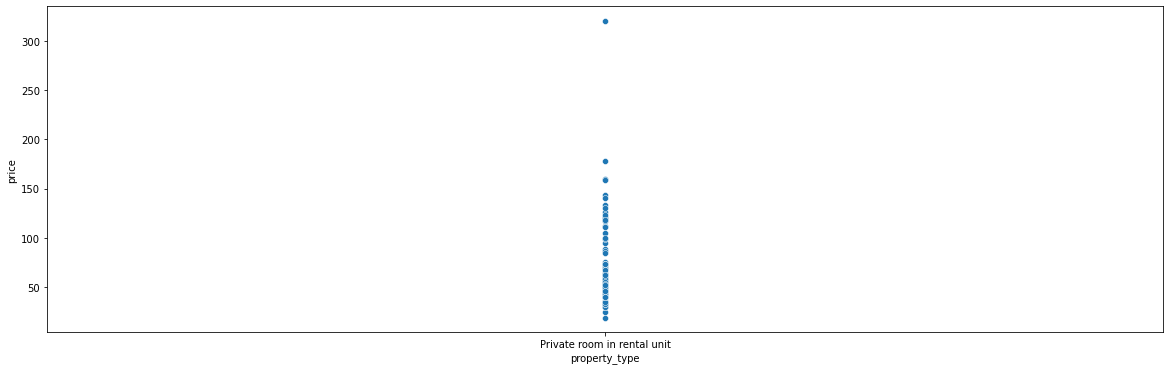

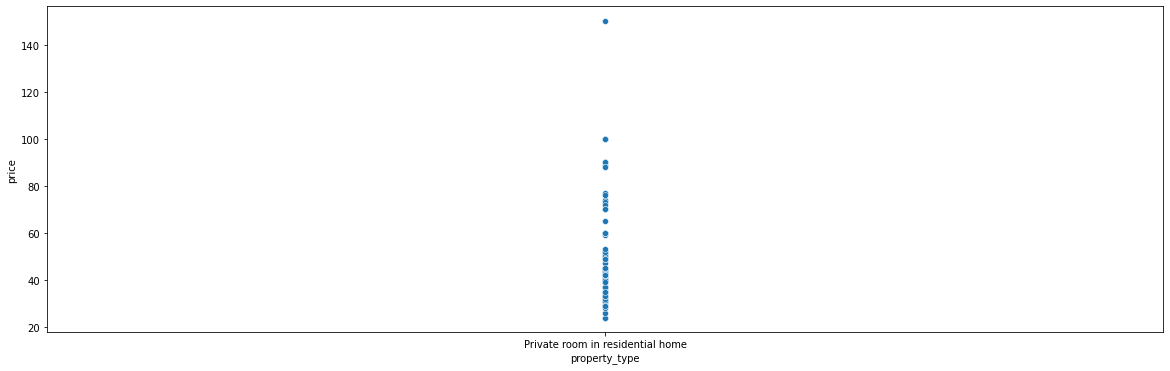

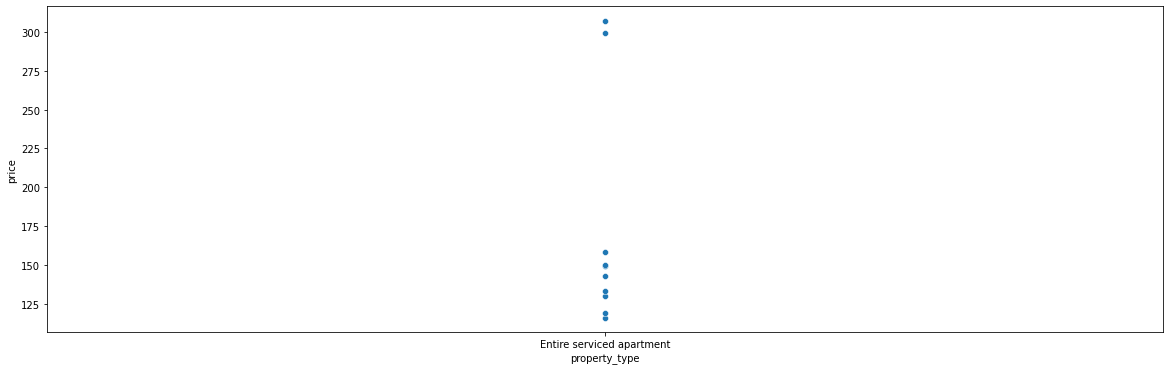

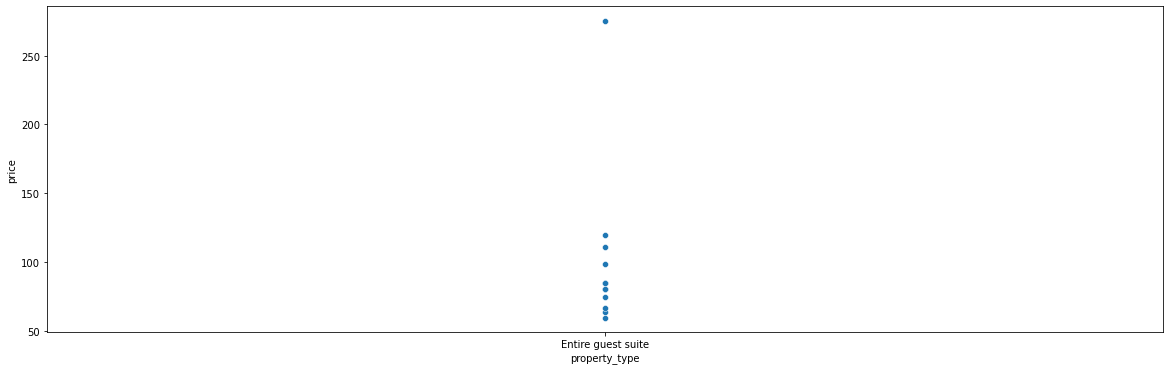

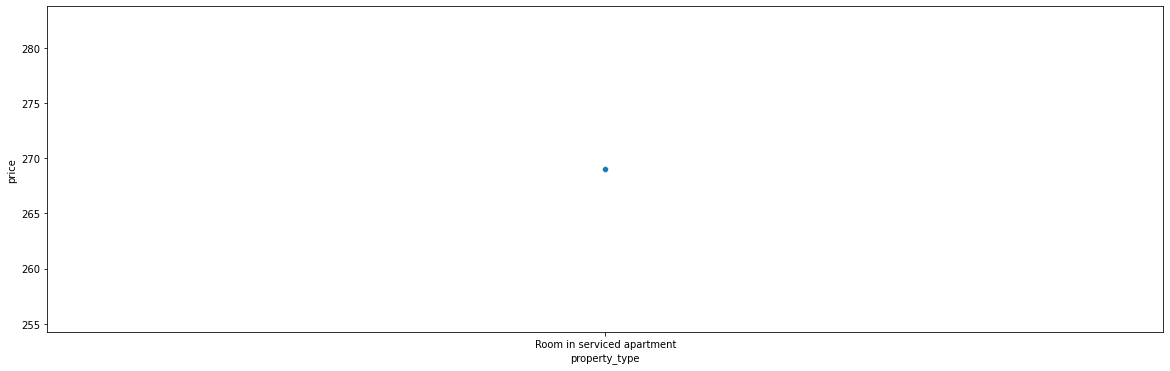

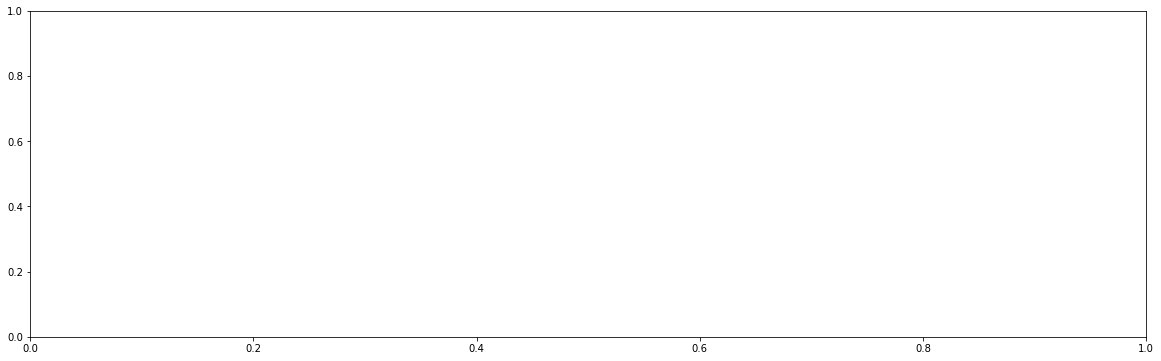

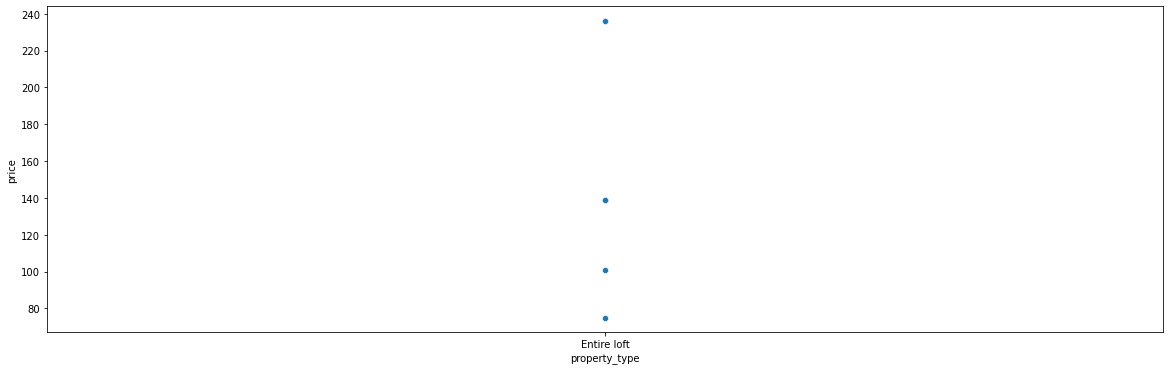

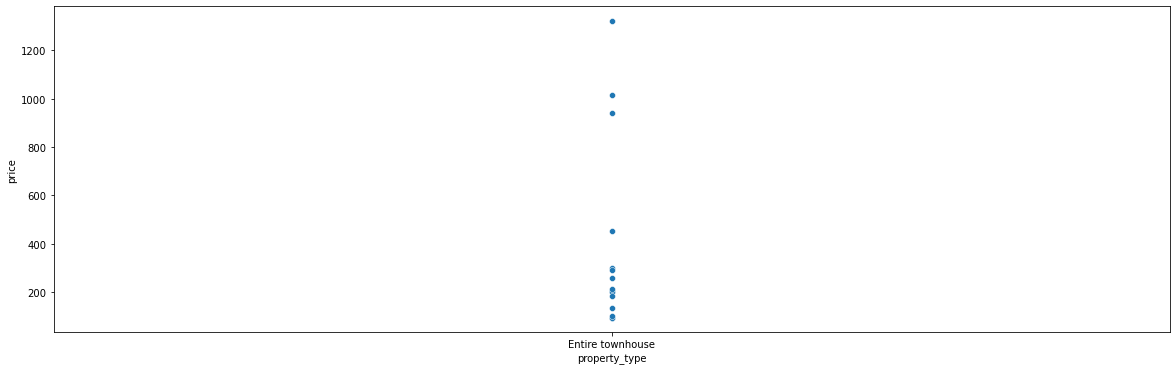

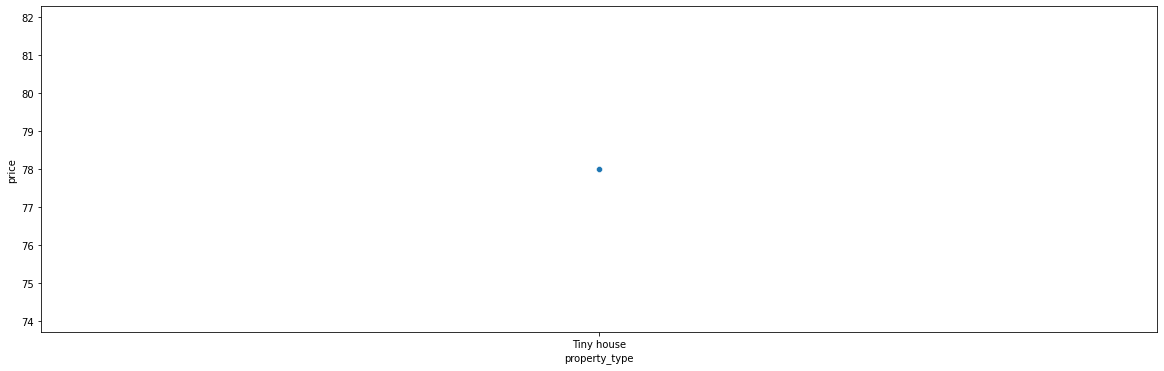

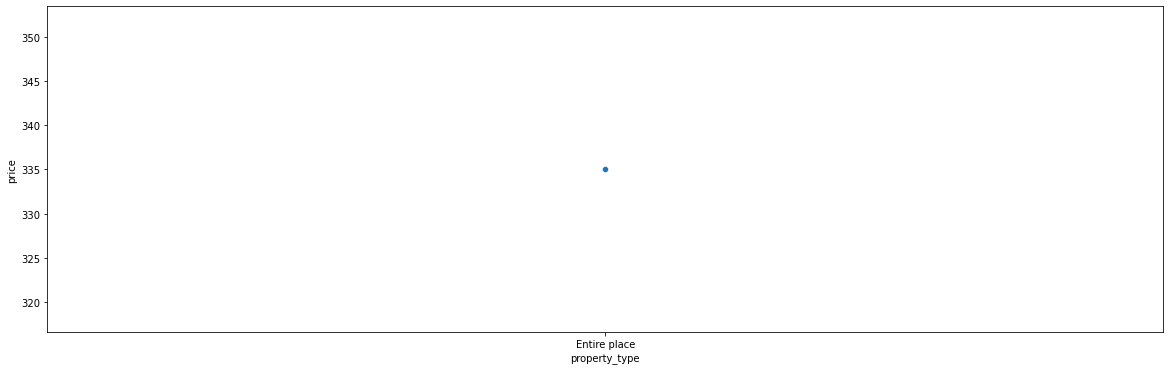

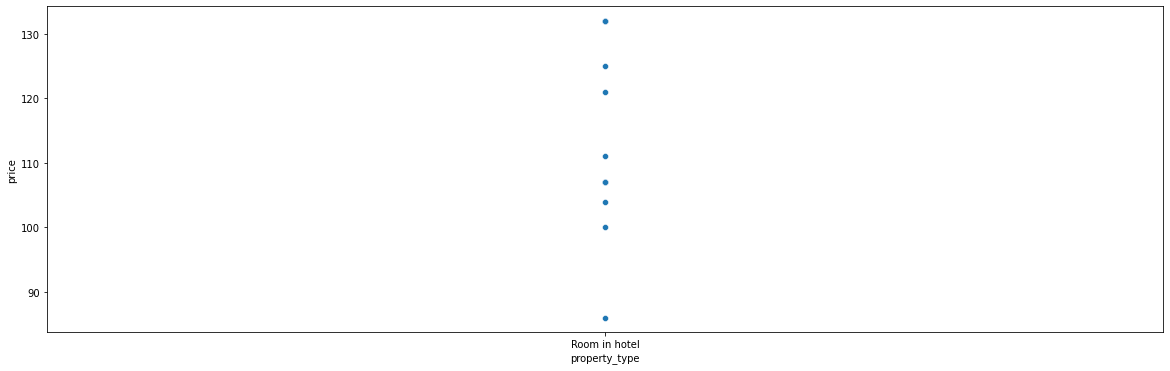

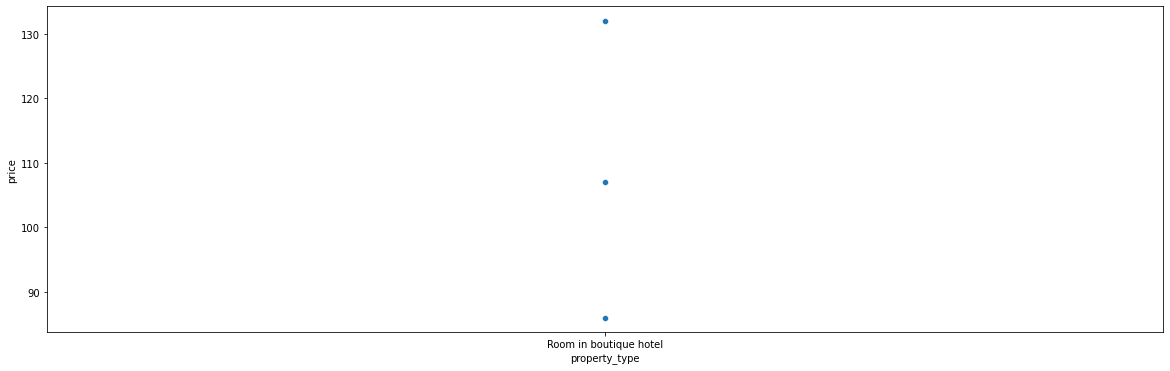

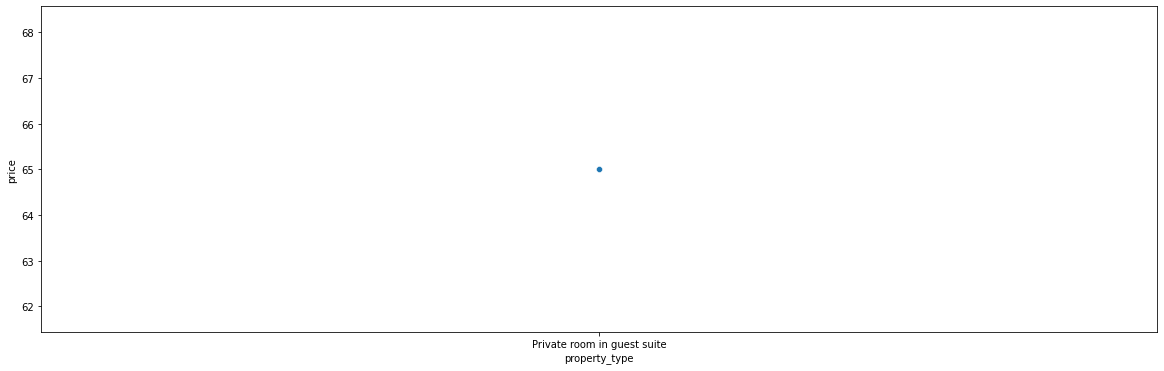

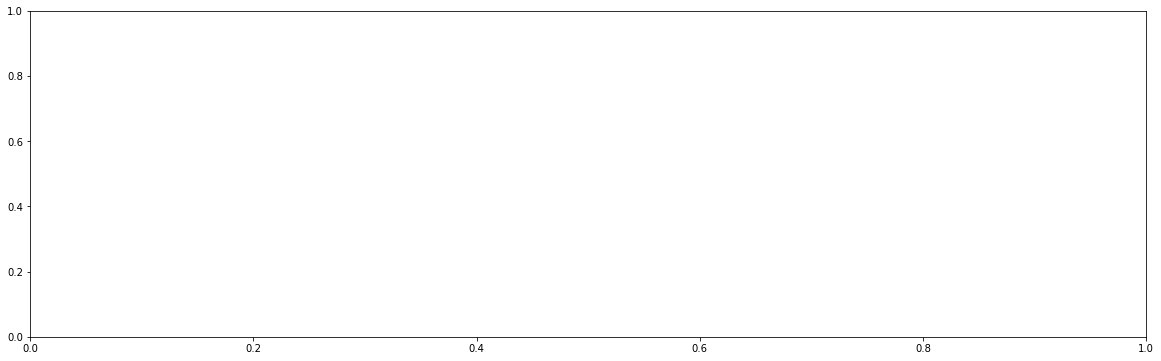

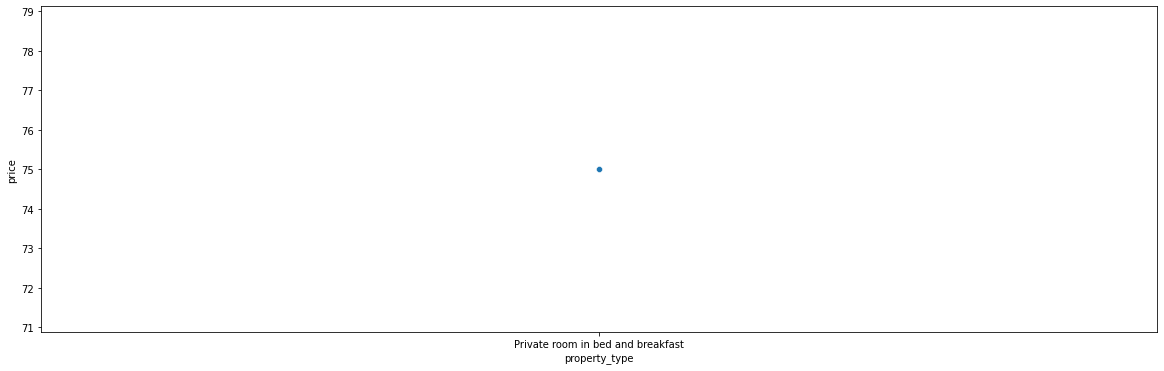

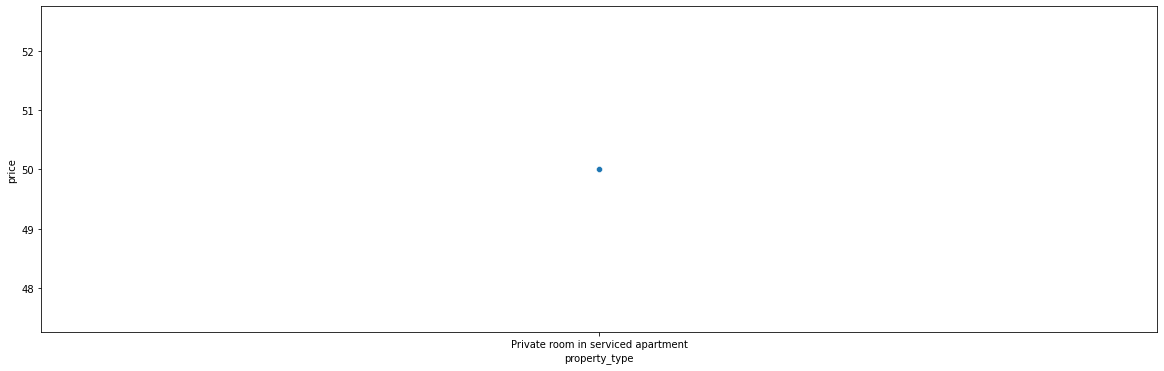

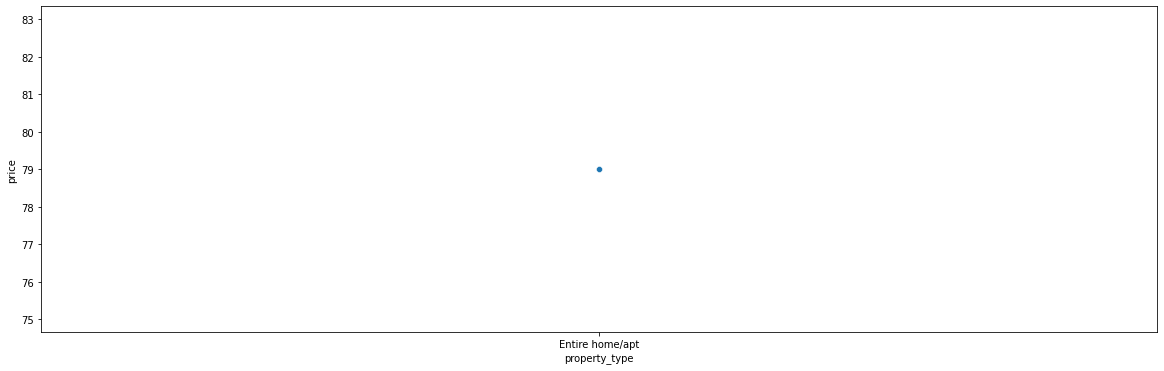

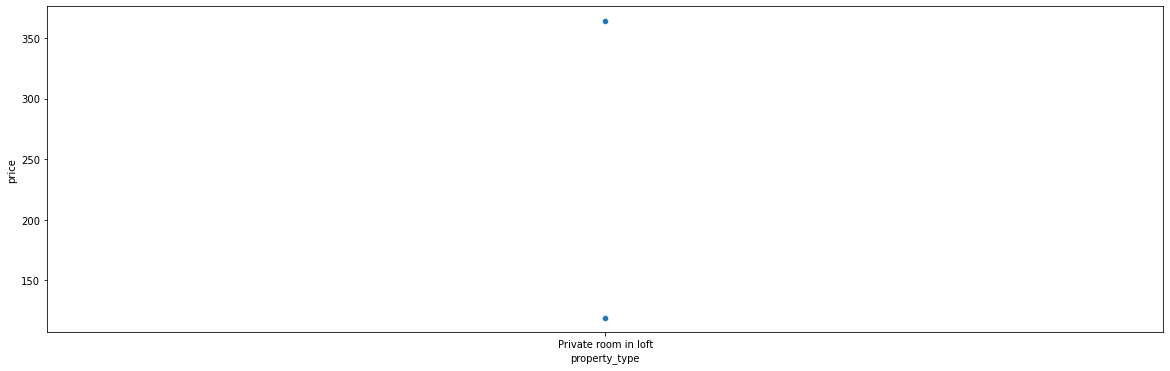

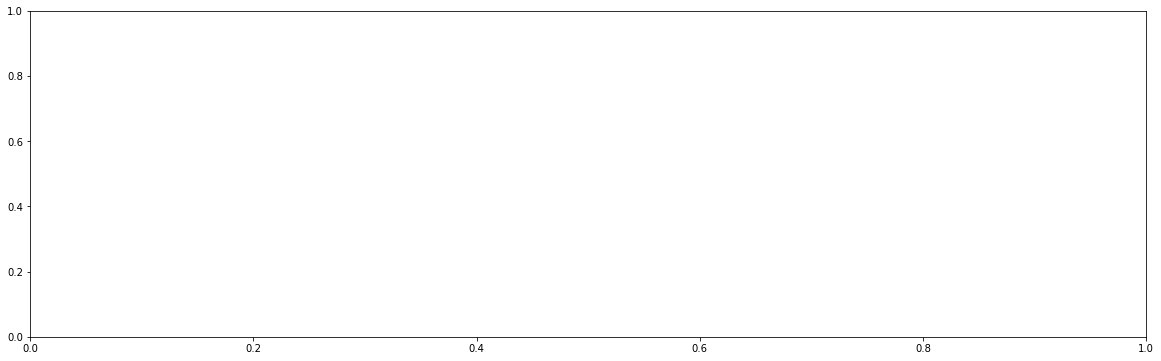

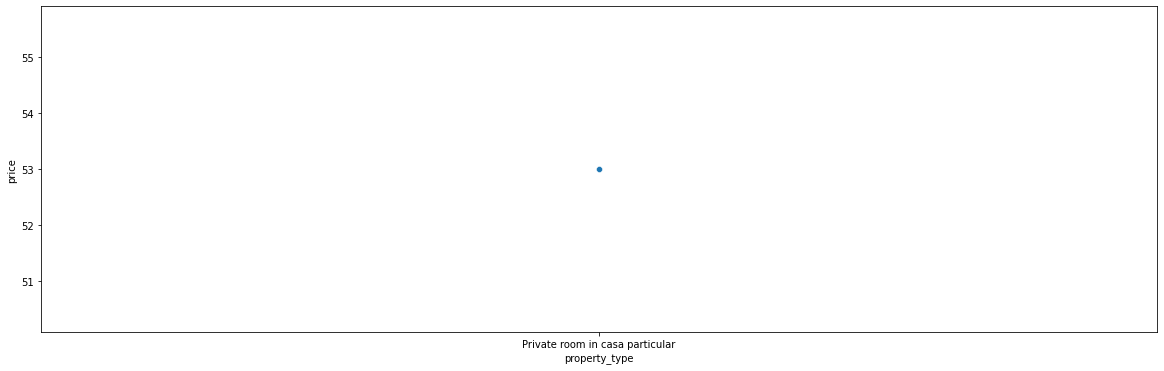

In [152]:
for ptype in new_df.property_type.unique():
    plt.figure(figsize=(20,6))
    sns.scatterplot(x='property_type', y='price', data=newer_df[newer_df.property_type==ptype])
    
    plt.show()

In [ ]:
newer_df[new_df.property_type=='Private room in casa particular']

## Dummy variables for room_type

#  Super Host

In [97]:
newer_df.host_is_superhost.value_counts()

f    523
t    214
Name: host_is_superhost, dtype: int64

In [ ]:
Modeling

In [ ]:
Evaluation

In [ ]:
Deployment